# Homework 2: Interpolation

## Objectives

In this homework we will focus on
- Trigonometric functions and issues involved with them.  In particular units and difficulties in working with the inverse trigonometric functions.
- Using and understanding the behavior of splines as implemented in `scipy.interpolate`.

## Initialization

As always you should add initialization to the top of your notebook. Though not strictly necessary, it is a good habit to include all initialization here.

In [52]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
%matplotlib inline

## Trigonometric functions

Trigonometric functions in most math libraries accept arguments in radians.  Similarly, the inverse trigonometric functions return values in radians. 

To verify this is true in `numpy` calculate and print $\sin(\pi/2)$ and $\sin^{-1}(\sin(\pi/2))$. Compare the latter result to $\pi/2$.  Note that you can access the required trigonometric functions in `numpy` as `sin` and `arcsin`.

In [43]:
# YOUR CODE HERE
print(np.sin(np.pi/2.0))
print(np.arcsin(np.sin(np.pi/2.0)))
print(np.pi/2.0)

1.0
1.5707963267948966
1.5707963267948966


We can do the same thing with other trigonometric functions.  Let us try the tangent function.  Calculate and print $\tan(5\pi/3)$, $\tan^{-1}(\tan(5\pi/3))$, and compare the result of the latter to $5\pi/3$.  Here you can use the `numpy` functions `tan` and `arctan`.

In [44]:
# YOUR CODE HERE
print(np.tan(5*np.pi/3.0))
print(np.arctan(np.tan(5*np.pi/3.0)))
print(5.0*np.pi/3.0)

-1.732050807568877
-1.0471975511965976
5.235987755982989


You should notice that `arctan` **does not appear to work!**  To further explore this behavior, let us make a few plots.

The tangent function, like most functions in `numpy`, can accept arrays as an input. Define a range of $\theta$ values between $-\pi$ and $\pi$ in 500 evenly spaced points.  Use this array to plot the tangent function.

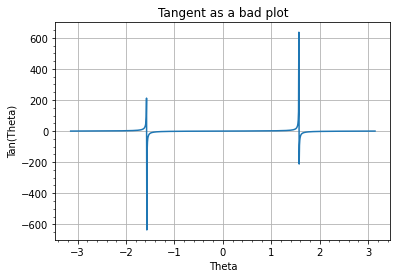

In [45]:
# YOUR CODE HERE
x = np.linspace(-np.pi,np.pi,num=1000)
y = np.tan(x)
plt.plot(x,y)
plt.title("Tangent as a bad plot")
plt.xlabel("Theta")
plt.ylabel("Tan(Theta)")
plt.grid()
plt.minorticks_on()
plt.show()

This plot does not look very good!  Not just that it is a "quick plot", but also the scaling of the $y$-axis makes this hard to read.

In contrast to other software you may have used to make plots, `matplotlib` will plot exactly what you tell it to.  Since the tangent function diverges in the plot range, it tries to show you all the values you asked for rather than trying to cleverly cut off the plot to show you what it thinks you wanted.  This is good and bad.  It is good that it shows you exactly what you asked for and does not hide anything, but bad because it produces a plot that can be harder to read.
  
Increasing the number of points plotted would not make things better, in fact, it would only make the plot look worse! (You can try this, change the plot to use 5000 values in the range instead of 500.)

Although it is good to know that the function we are plotting diverges at certain points, we typically want to see the shape of the curve where it does not diverge, not just see a flat line that looks like zero over most of the range.  To focus on the range of values of interest to us we can set the axis limits by hand.  Not surprisingly we can do this use the `xlim` and `ylim` functions from `pyplot`.  (If you do this using axis objects, recall that you will need to prepend these with `set_`, so we would use `ax.set_ylim` for the limits on the $y$-axis.) Recreate your previous plot showing $y$ from $-7$ to $7$, and $x$ from $-\pi$ to $\pi$.

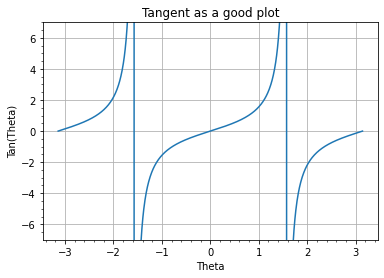

In [46]:
# YOUR CODE HERE
plt.plot(x,y)
plt.ylim(-7,7)
plt.title("Tangent as a good plot")
plt.xlabel("Theta")
plt.ylabel("Tan(Theta)")
plt.grid()
plt.minorticks_on()
plt.show()

Next, we look at how the inverse tangent behaves by again making a plot.  Using the same $\theta$ values as above, plot $\tan^{-1}(\tan \theta)$.  We would expect this to just be a plot of $\theta$ vs $\theta$, in otherwords, just a diagonal line.

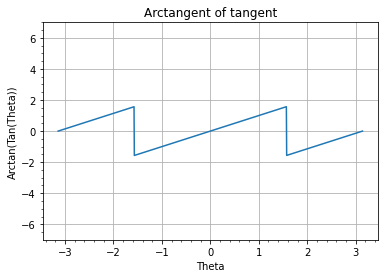

In [47]:
# YOUR CODE HERE
yinv = np.arctan(y)
plt.plot(x,yinv)
plt.ylim(-7,7)
plt.title("Arctangent of tangent")
plt.xlabel("Theta")
plt.ylabel("Arctan(Tan(Theta))")
plt.grid()
plt.minorticks_on()
plt.show()

Unfortunately, it isn't!  Instead it should look more like a sawtooth.  What is going on here?

Recall from your high school trigonometry that the value of the arctangent depends on the  quadrant in which you are performing the calculation.  This information is not available to `arctan`.  To see this, for a point a distance $r$ from the origin and an angle $\theta$ from the $x$-axis
$$\tan(\theta) = \frac{y}{x} = \frac{r\sin\theta}{r\cos\theta} = \frac{\sin\theta}{\cos\theta} .$$

Further recall that the signs of the $x$ and $y$ coordinates of our point determine the quadrant in which it is placed.  These signs get "lost" when we take the ratio.  To keep this information all math libraries (should, or must) define a new arctangent function that takes two arguments instead of one.  In `numpy` this function is called `arctan2(y,x)`.  Notice the order of the arguments, here `y` represents the numerator and `x` the denominator in the definition of the tangent given above. [Another common name is `atan2`.  *Almost all* libraries I have seen use the same order of the arguments as `numpy`, but sadly not all.  I have encountered cases where they are switched.  You should always check your documentation before blindly using a function.  You have been warned!]

Coming back to our example we can choose $y=\sin\theta$ and $x=\cos\theta$ to specify the quandrant for the test problem we have been working on.  Below, make a plot of $\tan^{-1}(\tan \theta)$ now using `arctan2`.

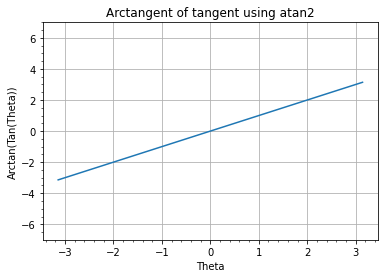

In [48]:
# YOUR CODE HERE
yinv2 = np.arctan2(np.sin(x),np.cos(x))
plt.plot(x,yinv2)
plt.ylim(-7,7)
plt.title("Arctangent of tangent using atan2")
plt.xlabel("Theta")
plt.ylabel("Arctan(Tan(Theta))")
plt.grid()
plt.minorticks_on()
plt.show()

This should correctly look like a "boring" diagonal line.  If you experiment with the $\theta$ values used, you will also note that it returns angles in the range $[-\pi,\pi)$ rather than $[0,2\pi)$.

## Accessing Data

When solving actual problems with actual data we need data into a format `numpy` can use.  One way to do this is to read in the data from an existing file.  A simple method for doing this is through the `loadtxt` function.  Here we will just use it to read in a simple data table, in the future we will explore some of its other features.  Since we have the full power of Python behind us there are many ways we can access the file containing our data table.

For this problem you will need to use some data located in a table accessible at https://sites.wustl.edu/mertens/files/2021/01/hw2.txt.  We can actually read this table directly from the web without needing to download the file; the following code does that for us.  In this case it will store the data in two arrays. The first column contains a time, which we will refer to as the `time` array, while the second is a `position`.

Below is some boiler plate code we can use for reading a data file.  This is the "pythonic" way to read a file.  We may work more with this in the future, but for now you can just use this code:

In [49]:
import urllib.request
url = 'https://sites.wustl.edu/mertens/files/2021/01/hw2.txt'
with urllib.request.urlopen(url) as fp :
    (time, position) = np.loadtxt(fp, unpack=True)

print ("Values stored in the `time` array:\n\t", time)
print ("Values stored in the `position` array:\n\t", position)

Values stored in the `time` array:
	 [1. 2. 3. 4. 7. 8. 9.]
Values stored in the `position` array:
	 [-3.4083885 -5.6100975 -5.8256509 -3.9787359  5.3127362  5.9562532
  4.4910645]


To become familiar with new data we can first make a plot of it.  Here we would like to plot the position versus time as points, instead of as a line.  This can be done using `plot`, however a shorthand way to do it is to instead use `scatter`. Create such a plot below.

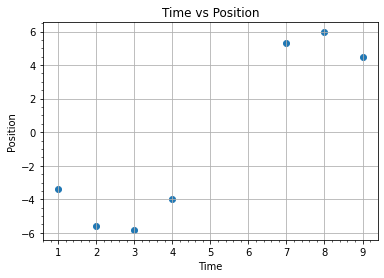

In [50]:
# YOUR CODE HERE
plt.scatter(time,position)
plt.title("Time vs Position")
plt.xlabel("Time")
plt.ylabel("Position")
plt.grid()
plt.minorticks_on()
plt.show()

The goal now is to create a function which interpolates between the data points.  To do this, we will use functions from the `scipy.interpolate` subpackage.  We can import this, giving it a shorthand name `interp`, and look at the docs for a list of available functions as was done in the example notebook this week.

## Using Splines

Import `scipy.interpolate`.  This can be done in the initialization at the top of the notebook or in any cell before it gets used.  The main function we will study here is `InterpolatedUnivariateSpline`.  You should review its documentation.  The interface it provides is not the easiest to understand so we will explore it in more detail.

Note: In the documentation of some functions you may see the first argument to the function is called `self`.  In general, you can ignore it; it is **not** an argument you should attempt to pass.  The arguments you provide will begin after it.  The `self` argument is a result of how objects are implemented in Python.  It becomes important if you wish to create your own classes; feel free to look into this and use classes if you like, but you will not be required to this semester.

Keeping this in mind, we can create a spline from the data we read in above:

In [53]:
posInterpolation = interp.InterpolatedUnivariateSpline(time, position)

Notice that an object is returned.  We should look up documentation for this object and use `Tab` completion to see the functions contained in this object.

When reading the documention for the object stored in `posInterpolation` make sure you scroll all the way to the bottom where some important information is contained.  From there we see that `posInterpolation` can be called as a function.  When done so it returns the interpolated values for all the input values.  Further, we can easily access derivatives of the spline as we will see.

Interpolation produces a curve that is exact at the data points used to construct the spline.  We can verify this by evaluating the spline at one of the times from our data and comparing it to the given position.  Here we will use the third time in our data.  Note that arrays in `numpy` are indexed starting from zero so the third element has index 2.

In [ ]:
# These two better be the same!
print(posInterpolation(time[2]), position[2])

### Derivatives and Integrals

A spline is a piecewise polynomial interpolation.  Since it is easy to take derivatives and integrals of polynomials it is also easy to do the same for a spline.  When you look at the list of functions available in our spline, `posInterpolation`, you will see a confusing list available.  There is both `derivative` and `derivatives` along with `integral` and `antiderivative`.  

For derivatives there is an even easier way to calculate them.  When we evaluate the spline as we did in the test above there is an optional argument we can include which calculates the derivative.  The basic form is
> `posInterpolation(x, nu=0)`

where `nu` is the order of the derivative.  The default `nu=0` means to evaluate the function (no derivatives), `nu=1` is the first derivative, *etc*. 

To explore this more let us calculate the derivative at the time 2.2.  First use `derivatives` for this.  It will produce an array of all the derivatives of the spline at this time.

In [ ]:
posInterpolation.derivatives(2.2)

You will find there are only a few values, but, this is supposed to be **all** the derivatives.  You should think about why there are only a few. As a hint, what is the order of the piecewise polynomial used in the spline we created?

Now use the `nu` argument as discussed above to calculate the derivatives and compare them to the values from the list you just found. (You only need to show one example, but should verify they all work, it is also interesting to see what happens when you use a large value for `nu`.)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

An advantage of using the `nu` argument is that we can calculate the derivative at a given order for an array of values.  Let us put all these ideas together by producing a plot.  Do this by creating a finely spaces array of time values from 0 to 12.  Include lines for the spline and its first derivative on this plot.  Also include the original data as points in the plot.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

You may also want to see what happens when you compute the second derivative of the spline, 3rd derivative, or higher. What happens? Is this an expected behavior of a spline?

## More on interpolation and extrapolation

<table style="float: right;">
    <tr><th>Year</th><th>Population (Billions)</th></tr>
<tr><td>1950</td><td>2.557629</td></tr>
<tr><td>1970</td><td>3.713423</td></tr>
<tr><td>1980</td><td>4.445386</td></tr>
<tr><td>1990</td><td>5.286811</td></tr>
<tr><td>2000</td><td>6.086149</td></tr>
<tr><td>2010</td><td>6.872671</td></tr>
<tr><td>2050</td><td>9.374484</td></tr>
</table>

The world population for a number of years is provided in the table at the
right. We will use this data to explore some aspects of
interpolation and extrapolation with linear and quadratic
polynomials. The Lagrange interpolating polynomial can
easily be constructed “by hand” and there are some ad-
vantages to doing this, once. Alternatively you may use
scipy.interpolate.lagrange if you prefer. Notice that the
table includes a population for the year 2050. This value is
based on a model which is a very different way of estimating
the value than we will employ here.

[*Note: I have included
all the digits in the population values given in the data base.
There the values are quoted in thousands. Does it make sense
that the population of the entire world can be determined to
within 1000 people? In fact, on what day is the population
determined for the year? The website goes into more details about the methodology.
For our purposes we can truncate the values to a few significant digits.*]

Using the data from 1980 and 2000 linearly interpolate to find an estimate for the
population in 1990. Calculate the fractional error between your estimate and the
reported value.

In [ ]:
# Population in billions.
# Corresponds to years 1950, 1970, 1980, 1990, 2000, 2010, 2050
pop = np.array([2.557629, 3.713423, 4.445386, 5.286811, 6.086149, 6.086149, 9.374484 ])

# YOUR CODE HERE
raise NotImplementedError()

Using your linear polynomial from the previous part extrapolate it to estimate the
populations in 1950 and 2010. Again calculate the fractional errors between your
estimates and the reported values.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Again using your linear polynomial from the previous part extrapolate it to estimate
the populations in 2050 and 2100. We will comment on these values below.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Repeat all the previous parts now using a quadratic polynomial and the data from
1970, 1980, and 2000.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In general, extrapolation is dangerous, it can easily give nonsensical results. Based
on our results, do we expect linear or quadratic interpolation to give better estimates
in 2050 and 2100? Keep in mind that the 2050 value listed in the table is not a
true value, it is just a different estimate. Explain your reasoning. *Hint: What is
the behavior of a quadratic at large values of its argument? Is this a good or bad
feature for extrapolating the population?*